In [1]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn import preprocessing
import tensorflow as tf
import random
import matplotlib
from matplotlib import pyplot as plt
import statistics
from pandas import DataFrame
from datetime import datetime
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Reshape, Flatten, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam, RMSprop
#from keras import backend as K
import keras.backend.tensorflow_backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from keras.backend.tensorflow_backend import set_session
from os.path import basename
#import seaborn as sns
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from scipy.stats import pearsonr

# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam




config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorf

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


# 출처: https://3months.tistory.com/206 [Deep Play]

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 179659180303681526
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8267812044
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6876971815486318227
physical_device_desc: "device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [3]:
workdir = "D://ResNetIC50//Dataset//MEYODG-51K"

In [4]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]

dataset = np.load(workdir + "//MEYODG51K_dataset.npz") # input file
ss0 = np.load(workdir + '//MEYODG51K_dataset_r2.npz') # split for training and test

In [5]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [6]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [7]:
# In[15]:
ab =[]
for i in range(100,200):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

0 27


In [8]:
x.shape

(51787, 79724)

In [9]:
training_image_array.shape

(46609, 79724)

In [10]:
# In[21]:

num_classes = 1
learning_rate = 0.0002
training_epochs = 150
batch_size = 100
img_rows, img_cols = 154, 154


In [11]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [13]:
shape_value = 77399
print(shape_value)

77399


In [14]:
train_X.shape

(46609, 79724)

In [15]:
train_X_cell = train_X[:,:shape_value]
train_X_drug =train_X[:,shape_value:]
test_X_cell = test_X[:,:shape_value]
test_X_drug = test_X[:,shape_value:]

In [16]:
train_X_cell.shape

(46609, 77399)

In [17]:
train_X_cell = train_X_cell.reshape(train_X_cell.shape[0], train_X_cell.shape[1], 1)
train_X_drug = train_X_drug.reshape(train_X_drug.shape[0], train_X_drug.shape[1], 1)
test_X_cell = test_X_cell.reshape(test_X_cell.shape[0], test_X_cell.shape[1], 1)
test_X_drug = test_X_drug.reshape(test_X_drug.shape[0], test_X_drug.shape[1], 1)
#input_shape = (img_rows, img_cols, 1)

In [18]:
print(train_X_cell.shape,train_X_drug.shape, train_y.shape, test_X_cell.shape,test_X_drug.shape, test_y.shape)

(46609, 77399, 1) (46609, 2325, 1) (46609,) (5178, 77399, 1) (5178, 2325, 1) (5178,)


In [19]:
train_X_cell.shape

(46609, 77399, 1)

In [20]:
train_X_cell = train_X_cell.astype('float32')
test_X_cell = test_X_cell.astype('float32')
train_X_drug = train_X_drug.astype('float32')
test_X_drug = test_X_drug.astype('float32')

In [21]:
with K.tf.device('/GPU:0'):
    input_cell = Input(shape=(train_X_cell.shape[1], train_X_cell.shape[2]), name='cell_input')
    input_drug = Input(shape=(train_X_drug.shape[1], train_X_drug.shape[2]), name='drug_input')

    conv_cell_line_1 = Conv1D(filters=50, kernel_size=700, strides=5, activation='tanh')(input_cell)
    maxpool_cell_line_1 = MaxPooling1D(pool_size=5)(conv_cell_line_1)
    conv_cell_line_2 = Conv1D(filters=30, kernel_size=5, strides=2, activation='relu')(maxpool_cell_line_1)
    maxpool_cell_line_2 = MaxPooling1D(pool_size=10)(conv_cell_line_2)
    flatten_cell_line = Flatten()(maxpool_cell_line_2)
    dense_cell_line = Dense(100, activation='relu')(flatten_cell_line)
    dropout_cell_line = Dropout(0.1)(dense_cell_line)

    conv_drug_1 = Conv1D(filters=50, kernel_size=200, strides=3, activation='tanh')(input_drug)
    maxpool_drug_1 = MaxPooling1D(pool_size=5)(conv_drug_1)
    conv_drug_2 = Conv1D(filters=30, kernel_size=50, strides=5, activation='relu')(maxpool_drug_1)
    maxpool_drug_2 = MaxPooling1D(pool_size=10)(conv_drug_2)
    flatten_drug = Flatten()(maxpool_drug_2)
    dense_drug = Dense(100, activation='relu')(flatten_drug)
    dropout_drug = Dropout(0.1)(dense_drug)

    concatenate = Concatenate()([dropout_cell_line, dropout_drug])
    dense_1 = Dense(300, activation='tanh')(concatenate)
    dropout_1 = Dropout(0.1)(dense_1)
    reshape_1 = Reshape((300,1))(dropout_1)
    conv_1 = Conv1D(filters=30, kernel_size=150, strides=1, activation='relu')(reshape_1)
    maxpool_1 = MaxPooling1D(pool_size=2)(conv_1)
    conv_2 = Conv1D(filters=10, kernel_size=5, strides=1, activation='relu')(maxpool_1)
    maxpool_2 = MaxPooling1D(pool_size=3)(conv_2)
    conv_3 = Conv1D(filters=5, kernel_size=5, strides=1, activation='relu')(maxpool_2)
    maxpool_3 = MaxPooling1D(pool_size=3)(conv_3)
    dropout_2 = Dropout(0.1)(maxpool_3)
    flatten = Flatten()(dropout_2)
    dropout_3 = Dropout(0.2)(flatten)
    output = Dense(1, activation='linear', name='pred_lnIC50')(dropout_3)
    model = Model(inputs=[input_cell, input_drug], outputs=output, name='MasterModel')



In [22]:
model.summary()

Model: "MasterModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cell_input (InputLayer)         (None, 77399, 1)     0                                            
__________________________________________________________________________________________________
drug_input (InputLayer)         (None, 2325, 1)      0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 15340, 50)    35050       cell_input[0][0]                 
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 709, 50)      10050       drug_input[0][0]                 
________________________________________________________________________________________

In [23]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [24]:
optim = Adam(lr=0.0002)

model.compile(loss='mse',
		      optimizer=optim,
			  metrics=['mse','mae'])

StartTime8 = datetime.now()
print("StartTime :", StartTime8)
with K.tf.device('/GPU:0'):
    model_train = model.fit([train_X_cell, train_X_drug], train_y, validation_data=([test_X_cell, test_X_drug], test_y),
                            batch_size=batch_size,epochs=training_epochs,verbose=1)

EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2022-02-05 16:15:19.259796

Train on 46609 samples, validate on 5178 samples
Epoch 1/150
46609/46609 [==============================] - 37s 798us/step - loss: 6.4481 - mse: 6.4481 - mae: 1.9839 - val_loss: 3.6263 - val_mse: 3.6263 - val_mae: 1.4794
Epoch 2/150
46609/46609 [==============================] - 34s 719us/step - loss: 2.7674 - mse: 2.7674 - mae: 1.2909 - val_loss: 2.1997 - val_mse: 2.1997 - val_mae: 1.1174
Epoch 3/150
46609/46609 [==============================] - 33s 715us/step - loss: 2.1645 - mse: 2.1645 - mae: 1.1369 - val_loss: 1.7220 - val_mse: 1.7220 - val_mae: 0.9711
Epoch 4/150
46609/46609 [==============================] - 33s 717us/step - loss: 2.0214 - mse: 2.0214 - mae: 1.0935 - val_loss: 1.9222 - val_mse: 1.9222 - val_mae: 1.0376
Epoch 5/150
46609/46609 [==============================] - 33s 714us/step - loss: 1.9569 - mse: 1.9569 - mae: 1.0739 - val_loss: 1.6919 - val_mse: 1.6919 - val_mae: 0.9829
Epoch 6/150
46609/46609 [==========================

Epoch 46/150
46609/46609 [==============================] - 34s 726us/step - loss: 1.4266 - mse: 1.4266 - mae: 0.9067 - val_loss: 1.3085 - val_mse: 1.3085 - val_mae: 0.8518
Epoch 47/150
46609/46609 [==============================] - 34s 727us/step - loss: 1.4039 - mse: 1.4039 - mae: 0.8979 - val_loss: 1.2760 - val_mse: 1.2760 - val_mae: 0.8261
Epoch 48/150
46609/46609 [==============================] - 34s 723us/step - loss: 1.4125 - mse: 1.4125 - mae: 0.9019 - val_loss: 1.2702 - val_mse: 1.2702 - val_mae: 0.8248
Epoch 49/150
46609/46609 [==============================] - 34s 723us/step - loss: 1.4004 - mse: 1.4004 - mae: 0.8996 - val_loss: 1.2630 - val_mse: 1.2630 - val_mae: 0.8116
Epoch 50/150
46609/46609 [==============================] - 34s 727us/step - loss: 1.3882 - mse: 1.3882 - mae: 0.8965 - val_loss: 1.2822 - val_mse: 1.2822 - val_mae: 0.8411
Epoch 51/150
46609/46609 [==============================] - 34s 733us/step - loss: 1.3814 - mse: 1.3814 - mae: 0.8925 - val_loss: 1.278

46609/46609 [==============================] - 33s 715us/step - loss: 1.2130 - mse: 1.2130 - mae: 0.8359 - val_loss: 1.1224 - val_mse: 1.1224 - val_mae: 0.7774
Epoch 94/150
46609/46609 [==============================] - 33s 717us/step - loss: 1.2051 - mse: 1.2051 - mae: 0.8345 - val_loss: 1.1177 - val_mse: 1.1177 - val_mae: 0.7751
Epoch 95/150
46609/46609 [==============================] - 33s 716us/step - loss: 1.2115 - mse: 1.2115 - mae: 0.8383 - val_loss: 1.1011 - val_mse: 1.1011 - val_mae: 0.7619
Epoch 96/150
46609/46609 [==============================] - 33s 717us/step - loss: 1.2069 - mse: 1.2069 - mae: 0.8363 - val_loss: 1.0958 - val_mse: 1.0958 - val_mae: 0.7639
Epoch 97/150
46609/46609 [==============================] - 33s 718us/step - loss: 1.2004 - mse: 1.2004 - mae: 0.8325 - val_loss: 1.1057 - val_mse: 1.1057 - val_mae: 0.7609
Epoch 98/150
46609/46609 [==============================] - 33s 717us/step - loss: 1.1977 - mse: 1.1977 - mae: 0.8338 - val_loss: 1.0932 - val_mse: 

46609/46609 [==============================] - 33s 717us/step - loss: 1.1153 - mse: 1.1153 - mae: 0.8076 - val_loss: 1.0576 - val_mse: 1.0576 - val_mae: 0.7421
Epoch 138/150
46609/46609 [==============================] - 33s 717us/step - loss: 1.1244 - mse: 1.1244 - mae: 0.8079 - val_loss: 1.0301 - val_mse: 1.0301 - val_mae: 0.7431
Epoch 139/150
46609/46609 [==============================] - 33s 717us/step - loss: 1.1155 - mse: 1.1155 - mae: 0.8052 - val_loss: 1.0420 - val_mse: 1.0420 - val_mae: 0.7379
Epoch 140/150
46609/46609 [==============================] - 33s 717us/step - loss: 1.1140 - mse: 1.1140 - mae: 0.8051 - val_loss: 1.0368 - val_mse: 1.0368 - val_mae: 0.7382
Epoch 141/150
46609/46609 [==============================] - 33s 717us/step - loss: 1.0974 - mse: 1.0974 - mae: 0.8012 - val_loss: 1.0443 - val_mse: 1.0443 - val_mae: 0.7413
Epoch 142/150
46609/46609 [==============================] - 33s 718us/step - loss: 1.1044 - mse: 1.1044 - mae: 0.8035 - val_loss: 1.0471 - val_

In [25]:
import json
from keras.models import model_from_json, load_model
workdir = "D://ResNetIC50//Result//MEYODG-51K//CDRScan"
# Option 1: Save Weights + Architecture
model.save_weights(workdir+ '//MEYODG51K_CDRScan_model_r2_fix_v3.h5')
with open(workdir + '//MEYODG51K_CDRScan_r2_model_architecture_fix_v3.json', 'w') as f:
    f.write(model.to_json())
# Option 1: Load Weights + Architecture
# with open('model_architecture.json', 'r') as f:
#     new_model_1 = model_from_json(f.read())
# new_model_1.load_weights('model_weights.h5')

In [26]:
# Option 2: Save/Load the Entire Model
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save(workdir + '//MEYODG51K_CDRScan_r2_model_fix_2080ti_v3.h5')

# Deletes the existing model
# del model  

# Returns a compiled model identical to the previous one
# model = load_model('my_model.h5')

In [27]:
test_eval = model.evaluate([test_X_cell,test_X_drug], test_label_array, verbose=1)

5178/5178 [==============================] - 2s 463us/step


In [28]:
test_eval

[1.0469620967288882, 1.046962022781372, 0.7506814002990723]

In [29]:
accuracy = model_train.history['mse']
val_accuracy = model_train.history['val_mse']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']

np_acc = np.array(accuracy)
np_val_acc = np.array(val_accuracy)
np_loss = np.array(loss)
np_val_loss = np.array(val_loss)

In [30]:
import matplotlib
from matplotlib import pyplot as plt

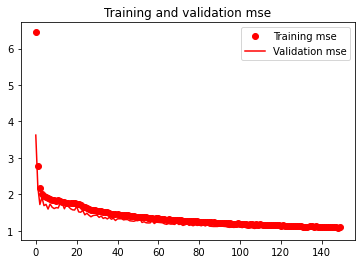

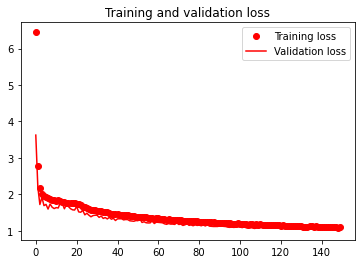

In [31]:
# accuracy = model_train.history['acc']
# val_accuracy = model_train.history['val_acc']
# loss = model_train.history['loss']
# val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training mse',c='red')
plt.plot(epochs, val_accuracy, 'b', label='Validation mse',c='red')
plt.title('Training and validation mse')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss',c='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss',c='red')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [32]:
predicted_classes = model.predict([test_X_cell,test_X_drug])

In [33]:
predicted_value = predicted_classes

In [34]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [35]:
c.to_csv(workdir + '//MEYODG51K_CDRScan_r2_pred_obs_table.csv')

In [36]:
c

,Predicted,Test
0,3.013170,3.455613
1,2.756042,1.777574
2,1.051724,0.871086
3,4.261437,3.506734
4,0.066525,0.079714
...,...,...
5173,3.707228,3.918200
5174,2.741405,3.739676
5175,3.648232,2.720437
5176,4.743402,3.543666


In [37]:
predicted_value.shape

(5178, 1)

In [38]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.8350710161441497, intercept=0.33864427437876676, rvalue=0.9320322639859056, pvalue=0.0, stderr=0.004512881389922881)

In [39]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.867371304217998


In [40]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.023211675294728


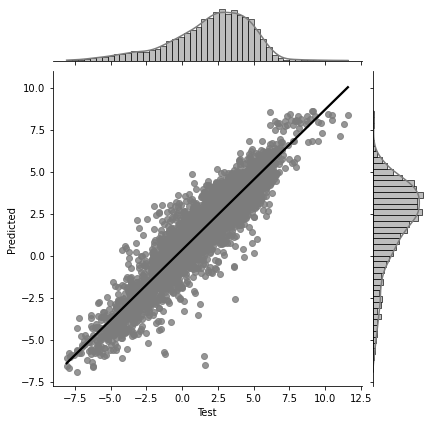

In [41]:
workdir = "D://ResNetIC50//Result//Figure//MEYODG-51K"
import seaborn as sns

g = sns.jointplot(x="Test", y="Predicted", data=c, kind='reg', color='#7C7C7C',
                  joint_kws={'line_kws':{'color':'black'}})
g.savefig(workdir+ '//MEYODG51K_CDRScan_r2.png', dpi=300)